# Regression (continued...)

Completed last session:
* Exploratory data analysis
* Data Preprocessing

This session:
* Use a pipeline to make it easy to apply transformation and fit models
* Use advanced models
* Tune hyperparameters of models
* K-Fold Cross validation

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/instituteofai/ML-101/master/Datasets/cal_housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
labels = df[['median_house_value']]
features = df.drop(['median_house_value'], axis=1)

In [4]:
features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY


In [5]:
labels.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder

# Pipeline for numeric attributes
numeric_pipeline = Pipeline([
    ('median_imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

# Pipeline for categorical attributes
categorical_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder())
])

In [43]:
from sklearn import set_config
set_config(display='diagram')
numeric_pipeline

Pipeline(steps=[('median_imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

In [44]:
categorical_pipeline

Pipeline(steps=[('one_hot_encoder', OneHotEncoder())])

In [45]:
from sklearn.compose import ColumnTransformer

numeric_attributes = [
    'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'
]

pipeline = ColumnTransformer([
    ('numerical_transformers', numeric_pipeline, numeric_attributes),
    ('categorical_transformers', categorical_pipeline, ['ocean_proximity']),
], remainder='passthrough')

In [46]:
pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical_transformers',
                                 Pipeline(steps=[('median_imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['housing_median_age', 'total_rooms',
                                  'total_bedrooms', 'population', 'households',
                                  'median_income']),
                                ('categorical_transformers',
                                 Pipeline(steps=[('one_hot_encoder',
                                                  OneHotEncoder())]),
                                 ['ocean_proximity'])])

In [48]:
pipeline.fit_transform(X_train)[0]

array([   0.34849025,    0.22256942,    0.21122752,    0.76827628,
          0.32290591,   -0.326196  ,    0.        ,    0.        ,
          0.        ,    0.        ,    1.        , -117.03      ,
         32.71      ])

In [49]:
from sklearn.linear_model import LinearRegression

model_pipeline = Pipeline([
    ('preprocessing', pipeline),
    ('model', LinearRegression())
])

model_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical_transformers',
                                                  Pipeline(steps=[('median_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('categorical_transformers',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('model', LinearRegression())])

In [50]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical_transformers',
                                                  Pipeline(steps=[('median_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('categorical_transformers',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('model', LinearRegression())])

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model_pipeline.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

RMSE: 70059.1933392499
R-squared: 0.6254382675296293


# Decision Trees

In [55]:
from sklearn.tree import DecisionTreeRegressor

tree_pipeline = Pipeline([
    ('preprocessing', pipeline),
    ('model', DecisionTreeRegressor())
])

tree_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical_transformers',
                                                  Pipeline(steps=[('median_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('categorical_transformers',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('model', DecisionTreeRegressor())])

In [104]:
%%time
tree_pipeline.fit(X_train, y_train)
predictions = tree_pipeline.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

RMSE: 68735.49739279397
R-squared: 0.6394584682884977
CPU times: user 221 ms, sys: 9.28 ms, total: 230 ms
Wall time: 235 ms


In [64]:
tree_pipeline['model']

DecisionTreeRegressor()

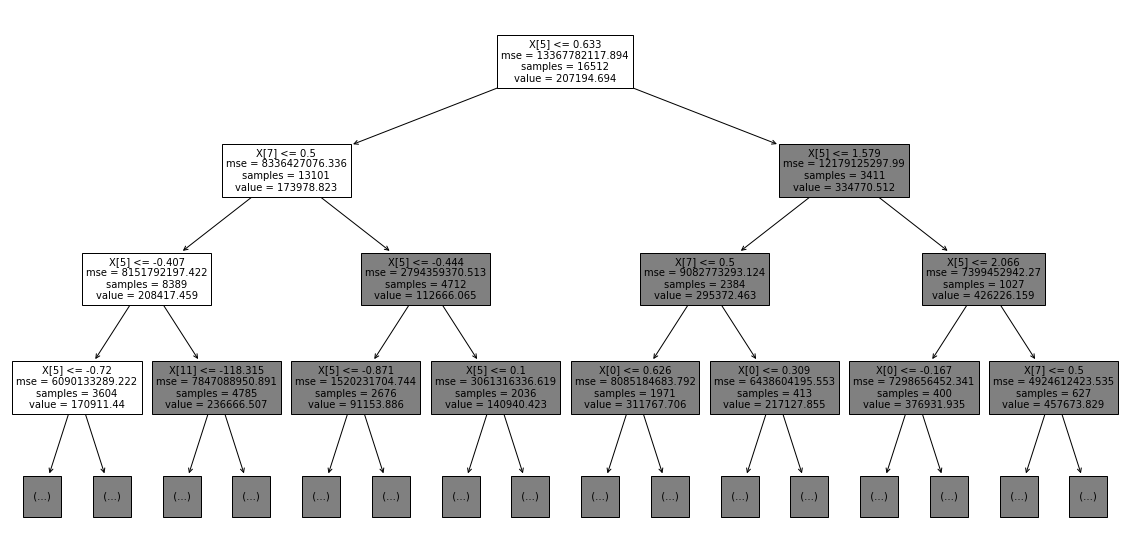

In [65]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_pipeline['model'], max_depth=3, fontsize=10)
plt.show()

# Random Forest

In [100]:
from sklearn.ensemble import RandomForestRegressor

forest_pipeline = Pipeline([
    ('preprocessing', pipeline),
    ('model', RandomForestRegressor())
])

forest_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical_transformers',
                                                  Pipeline(steps=[('median_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('categorical_transformers',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('model', RandomForestRegressor())])

In [103]:
%%time
forest_pipeline.fit(X_train, y_train.values.ravel())
predictions = forest_pipeline.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

RMSE: 49018.77639034619
R-squared: 0.8166343119815658
CPU times: user 9.68 s, sys: 211 ms, total: 9.89 s
Wall time: 10.1 s


# Hyperparameter tuning

In [106]:
forest_pipeline['model'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [110]:
from sklearn.model_selection import GridSearchCV

hyperparameters = dict(
    model__max_features=['auto', None],
    model__n_estimators=[100, 200]
)

gridsearch = GridSearchCV(forest_pipeline, hyperparameters, verbose=3, cv=3)

gridsearch.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] model__max_features=auto, model__n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_features=auto, model__n_estimators=100, score=0.818, total=   6.7s
[CV] model__max_features=auto, model__n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV]  model__max_features=auto, model__n_estimators=100, score=0.811, total=   6.6s
[CV] model__max_features=auto, model__n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.3s remaining:    0.0s


[CV]  model__max_features=auto, model__n_estimators=100, score=0.809, total=   6.5s
[CV] model__max_features=auto, model__n_estimators=200 ...............
[CV]  model__max_features=auto, model__n_estimators=200, score=0.818, total=  12.4s
[CV] model__max_features=auto, model__n_estimators=200 ...............
[CV]  model__max_features=auto, model__n_estimators=200, score=0.812, total=  12.6s
[CV] model__max_features=auto, model__n_estimators=200 ...............
[CV]  model__max_features=auto, model__n_estimators=200, score=0.811, total=  12.4s
[CV] model__max_features=None, model__n_estimators=100 ...............
[CV]  model__max_features=None, model__n_estimators=100, score=0.817, total=   6.2s
[CV] model__max_features=None, model__n_estimators=100 ...............
[CV]  model__max_features=None, model__n_estimators=100, score=0.811, total=   6.1s
[CV] model__max_features=None, model__n_estimators=100 ...............
[CV]  model__max_features=None, model__n_estimators=100, score=0.810, 

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.9min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numerical_transformers',
                                                                         Pipeline(steps=[('median_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_income']),
                                                                        ('categorical_transformers',
                                                                         Pipeline(steps=[('one_hot_encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['ocean_proximity'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_features': ['auto', None],
                         'model__n_estimators': [100, 200]},
             verbose=3)

In [111]:
gridsearch.best_params_

{'model__max_features': None, 'model__n_estimators': 200}

In [112]:
predictions = gridsearch.best_estimator_.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

RMSE: 48791.8265130301
R-squared: 0.8183282949058076


# Bonus

In [113]:
import ipywidgets as widgets
import numpy as np
from IPython.display import display

def make_widget(name):
    return widgets.FloatText(description=name, value=0)

feature_widgets = list(map(lambda x: make_widget(x), [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'
]))

proximity_widget = widgets.Dropdown(
    options=['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
    description='Ocean proximity',
)

feature_widgets.append(proximity_widget)
for widget in feature_widgets:
    display(widget)
    
output = widgets.Output()
predict_button = widgets.Button(description='Predict')
display(predict_button, output)
def on_predict(evt):
    with output:
        output.clear_output()
        print(f'Predicting...')
        inputs = list(map(lambda x: x.value, feature_widgets))
        print('Inputs: ', inputs)
        
        predict_df = pd.DataFrame(np.array(inputs).reshape(1,-1), columns=X_test.columns)
        
        prediction = gridsearch.predict(predict_df)
        print('Prediction: ', prediction)

predict_button.on_click(on_predict)

FloatText(value=0.0, description='longitude')

FloatText(value=0.0, description='latitude')

FloatText(value=0.0, description='housing_median_age')

FloatText(value=0.0, description='total_rooms')

FloatText(value=0.0, description='total_bedrooms')

FloatText(value=0.0, description='population')

FloatText(value=0.0, description='households')

FloatText(value=0.0, description='median_income')

Dropdown(description='Ocean proximity', options=('<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'), v…

Button(description='Predict', style=ButtonStyle())

Output()